## Description:
A third-party travel insurance servicing company that is based in Singapore

## Dataset Information
1)Claim Status (Claim.Status)

2)Name of agency (Agency)

3)Type of travel insurance agencies (Agency.Type)

4)Distribution channel of travel insurance agencies (Distribution.Channel)

5)Name of the travel insurance products (Product.Name)

6)Duration of travel (Duration)

7)Destination of travel (Destination)

8)Amount of sales of travel insurance policies (Net.Sales)

9)Commission received for travel insurance agency (Commission)

10)Gender of insured (Gender)

11)Age of insured (Age)

## Problem Statement
The objective of travel insurance dataset is to predict commission. The dataset of several predictors (independent)variables and one target variable that is comission.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
travels = pd.read_excel(r"C:\Users\mdine\Downloads\Machine Learning\Capstone Project\Travel\travels.xlsx")
travels.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
3,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26
4,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,F,30


## 1. Exploratory Data Analysis

1.1 Head of dataset

1.2 The shape of dataset

1.3 List types of all columns

1.4 Information of the dataset

1.5 Summary of the dataset

### 1.1 Head of the dataset

In [3]:
travels.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
3,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26
4,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,F,30


### 1.2 Shape of dataset

In [4]:
travels.shape

(60764, 11)

# 1.3 Types of all columns

In [5]:
travels.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'net_sales', 'commision', 'Gender',
       'Age'],
      dtype='object')

# 1.4 Information about column

In [6]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60764 entries, 0 to 60763
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                60764 non-null  object 
 1   Agency Type           60764 non-null  object 
 2   Distribution Channel  60764 non-null  object 
 3   Product Name          60764 non-null  object 
 4   Claim                 60764 non-null  object 
 5   Duration              60764 non-null  int64  
 6   Destination           60764 non-null  object 
 7   net_sales             60764 non-null  float64
 8   commision             60764 non-null  float64
 9   Gender                17787 non-null  object 
 10  Age                   60764 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.1+ MB


# 1.5 Describing the dataset

In [7]:
travels.describe()

,Duration,net_sales,commision,Age
count,60764.000000,60764.000000,60764.000000,60764.000000
mean,48.941824,43.098282,9.345712,39.983987
std,102.749482,47.786060,19.469582,14.027760
min,-2.000000,0.070000,0.000000,0.000000
25%,9.000000,19.800000,0.000000,35.000000
50%,22.000000,28.000000,0.000000,36.000000
75%,52.000000,49.500000,10.500000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


# 2. Finding Null Values

In [8]:
travels.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
net_sales                   0
commision                   0
Gender                  42977
Age                         0
dtype: int64

# 2.1 Checking for duplicates

In [9]:
travels.duplicated().sum()

7935

# Removing duplicates

In [10]:
travels.drop_duplicates(inplace=True)

In [11]:
travels.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
net_sales                   0
commision                   0
Gender                  36292
Age                         0
dtype: int64

# I want to remove null values becasue my data has 60000 rows it won't effect to my prediction

In [12]:
travels.dropna(inplace=True)

# 2.3 Checking for null again

In [13]:
travels.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
net_sales               0
commision               0
Gender                  0
Age                     0
dtype: int64

# checking outlies

<Axes: >

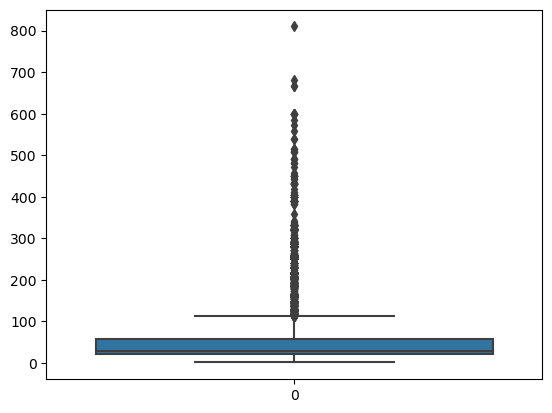

In [14]:
sns.boxplot(travels.net_sales)

## i will remove outlier using Interquartile Range (Interquartile range = Upper Quartile – Lower Quartile = Q­3 – Q­1)

In [15]:
Q1 = travels.net_sales.quantile(0.25)
Q3 = travels.net_sales.quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
travels=travels[(travels.net_sales>lower_limit)&(travels.net_sales<upper_limit)]

<Axes: >

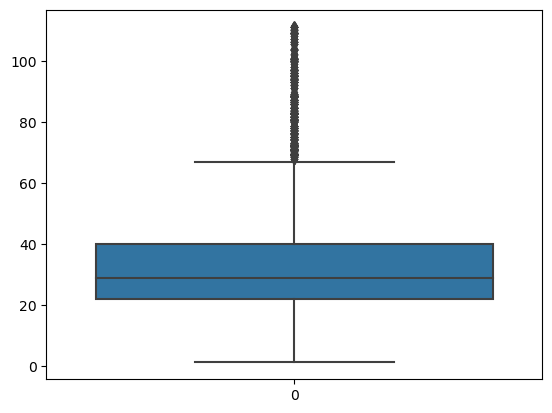

In [16]:
sns.boxplot(travels.net_sales)

<Axes: >

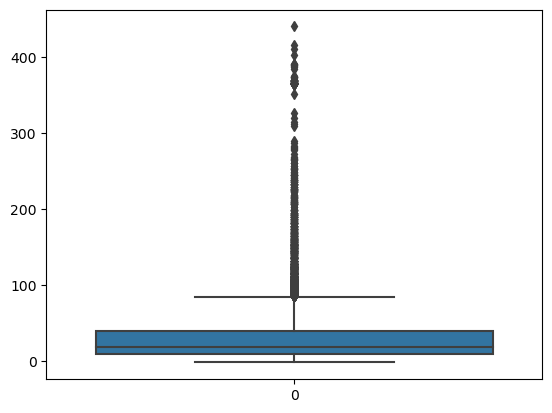

In [17]:
sns.boxplot(travels.Duration)

In [18]:
Q1 = travels.Duration.quantile(0.25)
Q3 = travels.Duration.quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
travels=travels[(travels.Duration>lower_limit)&(travels.Duration<upper_limit)]

<Axes: >

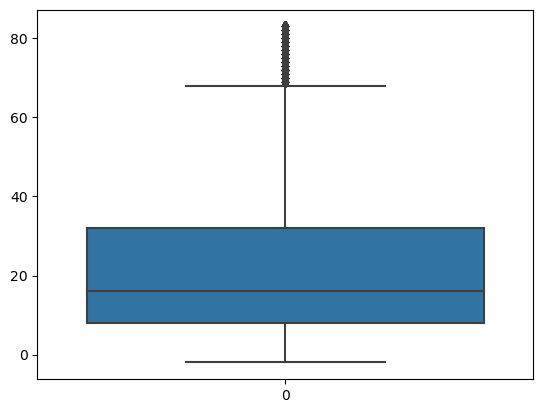

In [19]:
sns.boxplot(travels.Duration)

<Axes: >

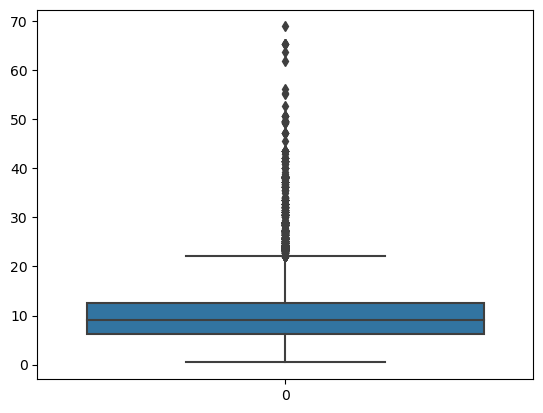

In [20]:
 sns.boxplot(travels.commision)

In [21]:
Q1 = travels.commision.quantile(0.25)
Q3 = travels.commision.quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
travels=travels[(travels.commision>lower_limit)&(travels.commision<upper_limit)]

<Axes: >

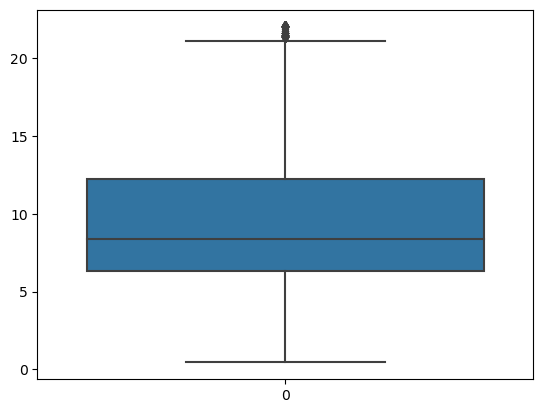

In [22]:
 sns.boxplot(travels.commision)

<Axes: >

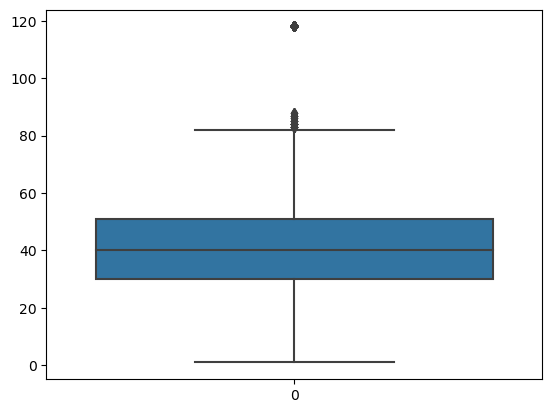

In [23]:
 sns.boxplot(travels.Age)

## here only one outlier that why i use this step

In [24]:
travels[(travels.Age>90)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
81,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,M,118
336,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,M,118
371,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,M,118
372,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,F,118
527,JWT,Airlines,Online,Value Plan,No,10,INDIA,31.0,12.40,M,118
...,...,...,...,...,...,...,...,...,...,...,...
59450,CCR,Travel Agency,Offline,Comprehensive Plan,No,13,MALAYSIA,29.0,9.57,F,118
59965,JWT,Airlines,Online,Value Plan,No,6,INDIA,50.0,20.00,M,118
60394,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,M,118
60534,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,M,118


In [25]:
travels=travels[(travels.Age<90)]

<Axes: >

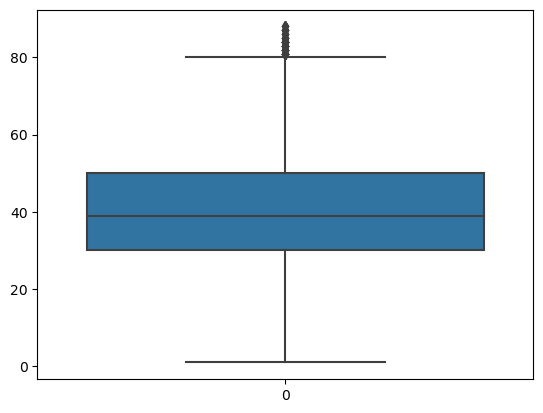

In [26]:
sns.boxplot(travels.Age)

In [27]:
travels

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
82,RAB,Airlines,Online,Value Plan,No,4,BRUNEI DARUSSALAM,15.00,6.00,M,44
85,JZI,Airlines,Online,Basic Plan,No,45,AUSTRALIA,26.00,9.10,M,31
87,JZI,Airlines,Online,Basic Plan,No,5,INDONESIA,22.00,7.70,F,29
...,...,...,...,...,...,...,...,...,...,...,...
60757,JZI,Airlines,Online,Basic Plan,No,10,CHINA,35.00,12.25,M,51
60758,JZI,Airlines,Online,Basic Plan,No,5,BRUNEI DARUSSALAM,18.00,6.30,M,27
60760,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,F,40
60761,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,M,57


# reset the index

In [28]:
travels.reset_index(inplace=True)

In [29]:
travels

,index,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,82,RAB,Airlines,Online,Value Plan,No,4,BRUNEI DARUSSALAM,15.00,6.00,M,44
3,85,JZI,Airlines,Online,Basic Plan,No,45,AUSTRALIA,26.00,9.10,M,31
4,87,JZI,Airlines,Online,Basic Plan,No,5,INDONESIA,22.00,7.70,F,29
...,...,...,...,...,...,...,...,...,...,...,...,...
12006,60757,JZI,Airlines,Online,Basic Plan,No,10,CHINA,35.00,12.25,M,51
12007,60758,JZI,Airlines,Online,Basic Plan,No,5,BRUNEI DARUSSALAM,18.00,6.30,M,27
12008,60760,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,F,40
12009,60761,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,M,57


In [30]:
travels.drop(columns='index',axis=1,inplace=True)

In [31]:
travels

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,RAB,Airlines,Online,Value Plan,No,4,BRUNEI DARUSSALAM,15.00,6.00,M,44
3,JZI,Airlines,Online,Basic Plan,No,45,AUSTRALIA,26.00,9.10,M,31
4,JZI,Airlines,Online,Basic Plan,No,5,INDONESIA,22.00,7.70,F,29
...,...,...,...,...,...,...,...,...,...,...,...
12006,JZI,Airlines,Online,Basic Plan,No,10,CHINA,35.00,12.25,M,51
12007,JZI,Airlines,Online,Basic Plan,No,5,BRUNEI DARUSSALAM,18.00,6.30,M,27
12008,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,F,40
12009,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,M,57


# 4.1 Checking values of Agency_type

In [32]:
travels['Agency Type'].value_counts()

Airlines         10981
Travel Agency     1030
Name: Agency Type, dtype: int64

# 4.2 Checking for each value under agency

In [33]:
travels.Agency.value_counts()

C2B    5457
JZI    4911
TST     454
RAB     409
ART     204
LWC     200
KML     172
CCR      92
CSR      56
CBH      53
ADM       2
CWT       1
Name: Agency, dtype: int64

# 4.3 Checking for Destination counts

In [34]:
travels.Destination.value_counts()

SINGAPORE                           5476
THAILAND                            1223
CHINA                                967
MALAYSIA                             859
INDONESIA                            637
HONG KONG                            538
PHILIPPINES                          440
BRUNEI DARUSSALAM                    409
VIET NAM                             268
MYANMAR                              193
TAIWAN, PROVINCE OF CHINA            178
JAPAN                                166
KOREA, REPUBLIC OF                   157
AUSTRALIA                            147
INDIA                                107
SRI LANKA                             48
CAMBODIA                              46
UNITED ARAB EMIRATES                  27
MACAO                                 22
LAO PEOPLE'S DEMOCRATIC REPUBLIC      18
NEW ZEALAND                           15
NETHERLANDS                           13
BANGLADESH                             8
UNITED KINGDOM                         7
UNITED STATES   

# 4.4 Checking for Distribution_Channel

In [35]:
travels['Distribution Channel'].value_counts()

Online     11352
Offline      659
Name: Distribution Channel, dtype: int64

# 4.5 Checking for claim counts

In [36]:
travels.Claim.value_counts()

No     11661
Yes      350
Name: Claim, dtype: int64

# 4.6 checking for product_name

In [37]:
travels['Product Name'].value_counts()

Basic Plan                             4504
Bronze Plan                            3394
Silver Plan                            1832
Value Plan                              965
Travel Cruise Protect                   454
Gold Plan                               231
Comprehensive Plan                      193
24 Protect                              184
Single Trip Travel Protect Silver        90
Single Trip Travel Protect Gold          81
Premier Plan                             53
Single Trip Travel Protect Platinum      29
Rental Vehicle Excess Insurance           1
Name: Product Name, dtype: int64

# 5. clustering Product name

In [38]:
product_Name=travels['Product Name'].value_counts()
product_Name  #i assigned data to rest_type variable

Basic Plan                             4504
Bronze Plan                            3394
Silver Plan                            1832
Value Plan                              965
Travel Cruise Protect                   454
Gold Plan                               231
Comprehensive Plan                      193
24 Protect                              184
Single Trip Travel Protect Silver        90
Single Trip Travel Protect Gold          81
Premier Plan                             53
Single Trip Travel Protect Platinum      29
Rental Vehicle Excess Insurance           1
Name: Product Name, dtype: int64

In [39]:
product_Name_less_1000=product_Name[product_Name<1000]
product_Name_less_1000  # filtered the data lessthan 1000 and assign

Value Plan                             965
Travel Cruise Protect                  454
Gold Plan                              231
Comprehensive Plan                     193
24 Protect                             184
Single Trip Travel Protect Silver       90
Single Trip Travel Protect Gold         81
Premier Plan                            53
Single Trip Travel Protect Platinum     29
Rental Vehicle Excess Insurance          1
Name: Product Name, dtype: int64

In [40]:
def clustering_my_data(data):   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if data in product_Name_less_1000:
        return 'others'
    else:
        return data
    

In [41]:
travels['Product Name']=travels['Product Name'].apply(clustering_my_data) # same like assigned the data

In [42]:
travels['Product Name'].value_counts()

Basic Plan     4504
Bronze Plan    3394
others         2281
Silver Plan    1832
Name: Product Name, dtype: int64

## 5.2 clustering on destination

In [43]:
values_travels = travels.Destination.value_counts()
values_travels800=values_travels[values_travels<800]  # filtered the data lessthan 800 and assig
def handle_destination(value):                   # using function like whereever 1 to 800 data is their then i shows 'Others'
    if(value in values_travels800):                                        # by using if statement
        return 'others'
    else:
        return value
travels['Destination']=travels['Destination'].apply(handle_destination) # same like assigned the data
travels['Destination'].value_counts()

SINGAPORE    5476
others       3486
THAILAND     1223
CHINA         967
MALAYSIA      859
Name: Destination, dtype: int64

# 6. Data Visulazitation

# 6.1 Normalizaton check

<Axes: xlabel='commision', ylabel='Density'>

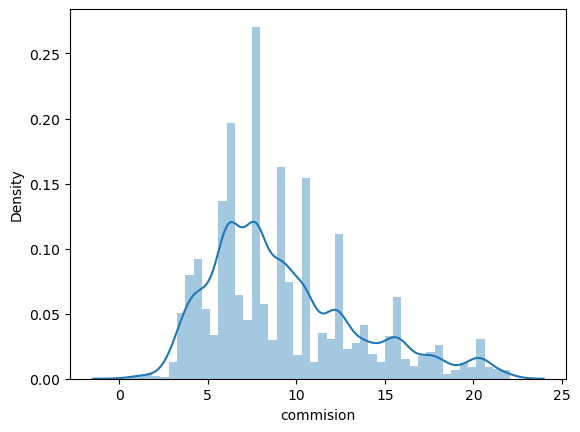

In [44]:
sns.distplot(travels['commision'])

<Axes: xlabel='commision', ylabel='Density'>

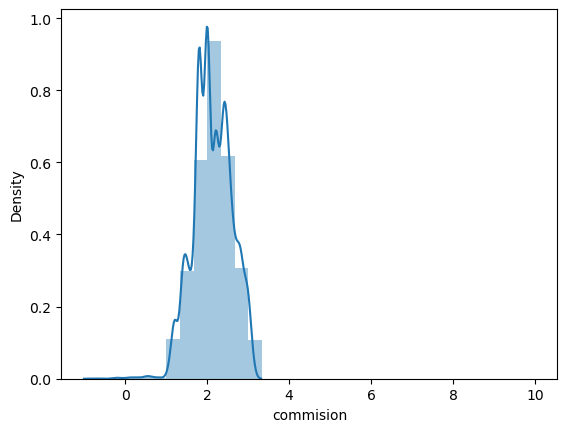

In [45]:
new_df=travels.copy()
new_df['commision']=np.log(travels['commision']).round(1)
sns.distplot(new_df['commision'],bins=30,hist_kws={"range": [0,10]})

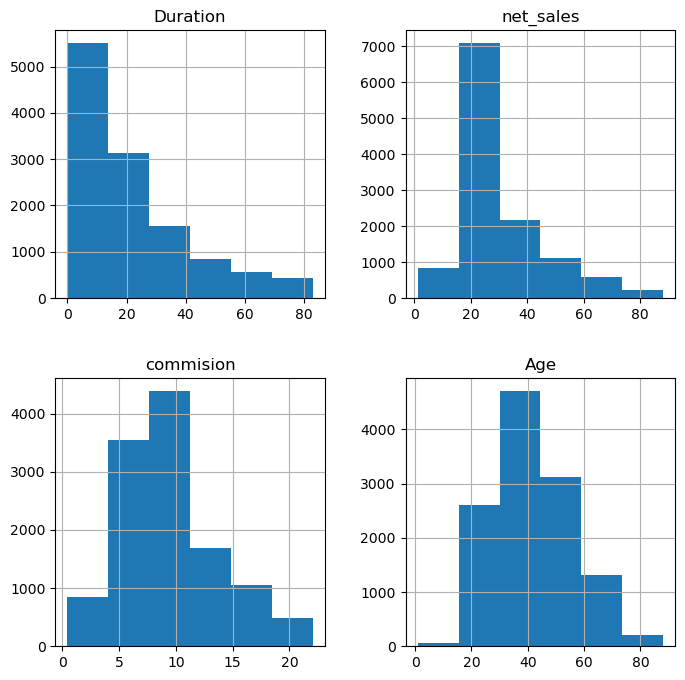

In [46]:
travels.hist(bins=6,figsize=(8,8))
plt.show()

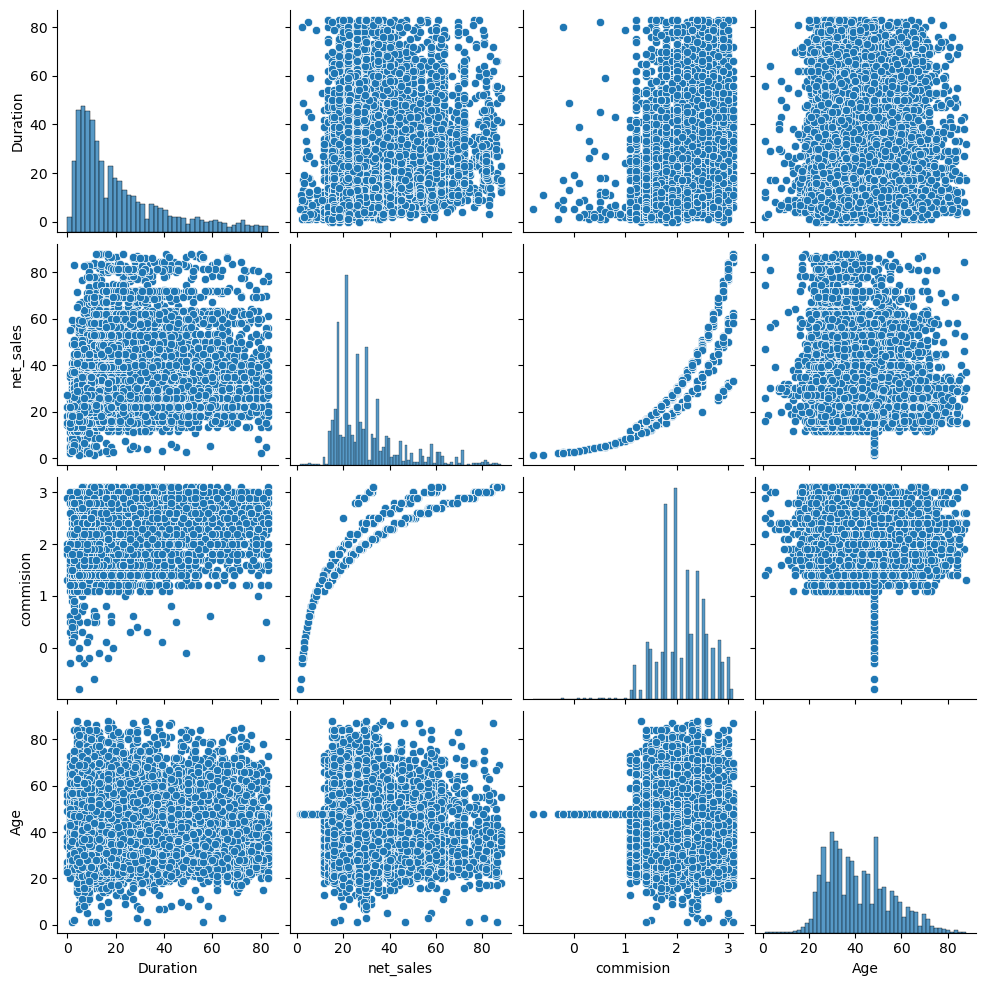

In [47]:
sns.pairplot(new_df)

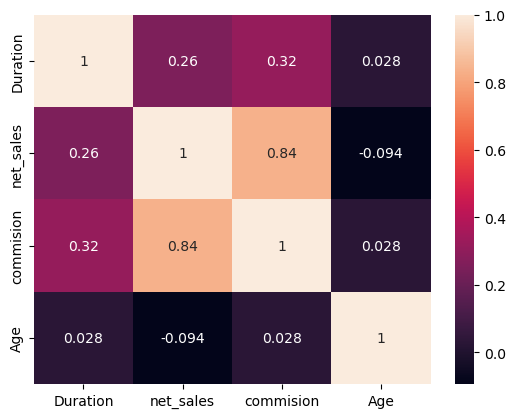

In [48]:
sns.heatmap(new_df.corr(), annot=True)
plt.show()

In [49]:
for i in new_df.columns:
    print(f'Column Name : {i}','\n')
    print(new_df[i].unique(),'\n')
    print(f'Number of unique values=',new_df[i].nunique(),'\n')

Column Name : Agency 

['C2B' 'RAB' 'JZI' 'ART' 'CBH' 'KML' 'CSR' 'CCR' 'ADM' 'LWC' 'TST' 'CWT'] 

Number of unique values= 12 

Column Name : Agency Type 

['Airlines' 'Travel Agency'] 

Number of unique values= 2 

Column Name : Distribution Channel 

['Online' 'Offline'] 

Number of unique values= 2 

Column Name : Product Name 

['Bronze Plan' 'others' 'Basic Plan' 'Silver Plan'] 

Number of unique values= 4 

Column Name : Claim 

['No' 'Yes'] 

Number of unique values= 2 

Column Name : Duration 

[12  7  4 45  5 22 76 41 43  3 20 29 23 13  6  2 15 28 21 34 19  9 18 32
 10 54 24 48 14 36 17 33 31 11 47 61 40  8 39 73 26 30 16 68 75 25 27  1
 35 74 51  0 38 67 71 37 70 44 59 65 77 49 83 52 79 63 80 42 58 66 62 78
 69 72 50 53 64 46 60 55 57 56 81 82] 

Number of unique values= 84 

Column Name : Destination 

['SINGAPORE' 'others' 'THAILAND' 'CHINA' 'MALAYSIA'] 

Number of unique values= 5 

Column Name : net_sales 

[46.15 17.55 15.   26.   22.   18.   35.   44.   12.5   4.99 47.

<Axes: xlabel='Agency Type', ylabel='count'>

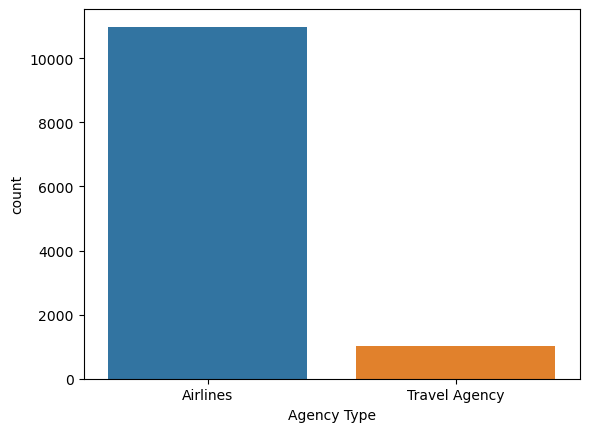

In [50]:
sns.countplot(x=new_df['Agency Type'],orient='v') 

Airlines is high as compared to travel agency 

In [51]:
travels.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'net_sales', 'commision', 'Gender',
       'Age'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

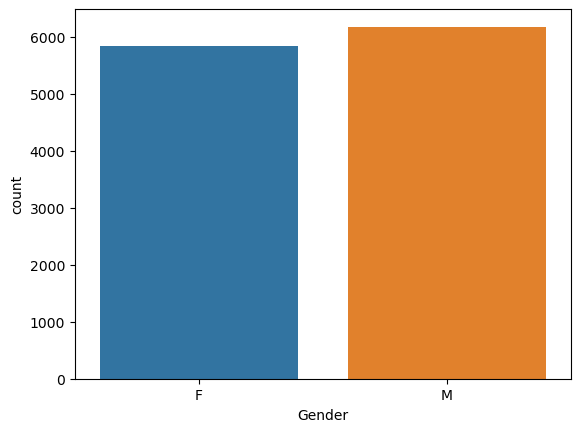

In [52]:
sns.countplot(x=new_df['Gender'],orient='v') 

In [ ]:
male is high comapred to female 

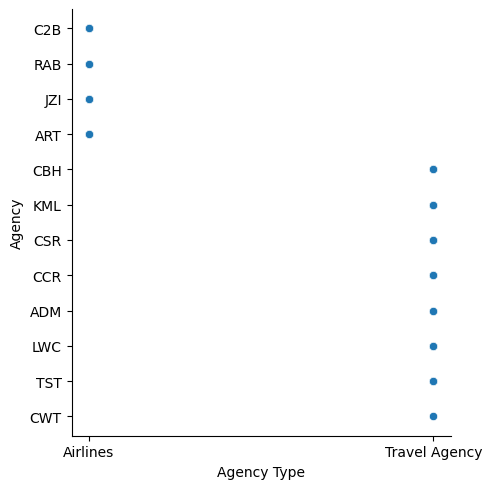

In [53]:
sns.relplot(x='Agency Type',y='Agency',data = new_df)  

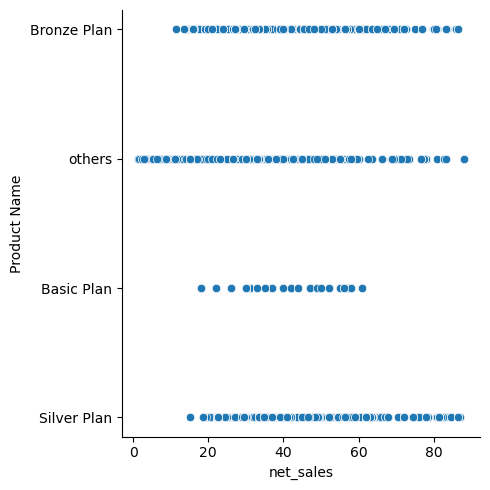

In [54]:
sns.relplot(x='net_sales',y='Product Name',data = new_df)

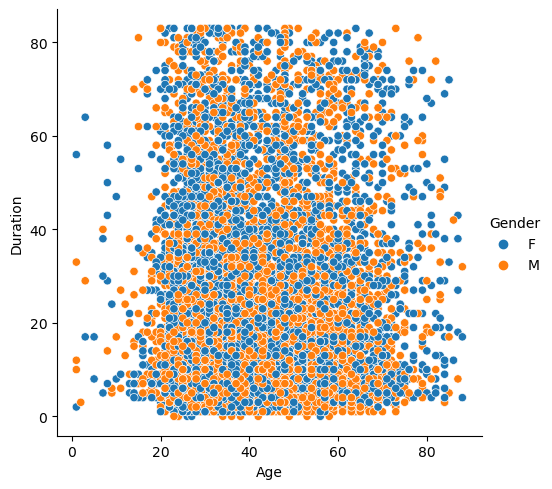

In [55]:
sns.relplot(x='Age',y='Duration',hue='Gender',data=new_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '-0.8'),
  Text(1, 0, '-0.6'),
  Text(2, 0, '-0.3'),
  Text(3, 0, '-0.2'),
  Text(4, 0, '-0.1'),
  Text(5, 0, '0.0'),
  Text(6, 0, '0.1'),
  Text(7, 0, '0.2'),
  Text(8, 0, '0.3'),
  Text(9, 0, '0.4'),
  Text(10, 0, '0.5'),
  Text(11, 0, '0.6'),
  Text(12, 0, '0.7'),
  Text(13, 0, '0.8'),
  Text(14, 0, '0.9'),
  Text(15, 0, '1.0'),
  Text(16, 0, '1.1'),
  Text(17, 0, '1.2'),
  Text(18, 0, '1.3'),
  Text(19, 0, '1.4'),
  Text(20, 0, '1.5'),
  Text(21, 0, '1.6'),
  Text(22, 0, '1.7'),
  Text(23, 0, '1.8'),
  Text(24, 0, '1.9'),
  Text(25, 0, '2.0'),
  Text(26, 0, '2.1'),
  Text(27, 0, '2.2'),
  Text(28, 0, '2.3'),
  Text(29, 0, '2.4'),
  Text(30, 0, '2.5'),
  Text(31, 0, '2.6'),
  Text(32, 0, '2.7'),
  Text(33, 0, '2.8'),
  Text(34, 0, '2.9'),
  Text(35, 0, '3.0'),
  Text(36, 0, '3.1')])

<Figure size 2000x2000 with 0 Axes>

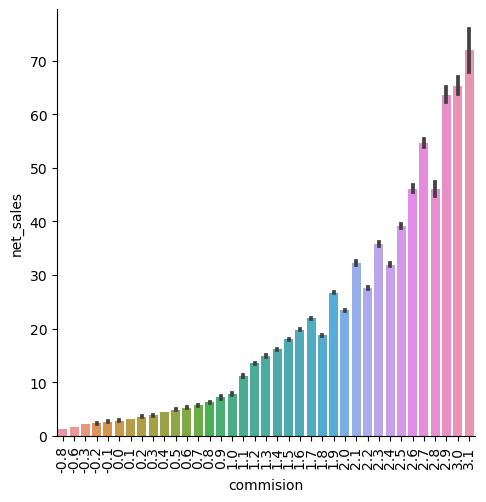

In [56]:
plt.figure(figsize = (20,20))
sns.catplot(x='commision',y='net_sales',kind='bar',data=new_df)
plt.xticks(rotation=90)

In [ ]:
commision 3.1 net_seles is high

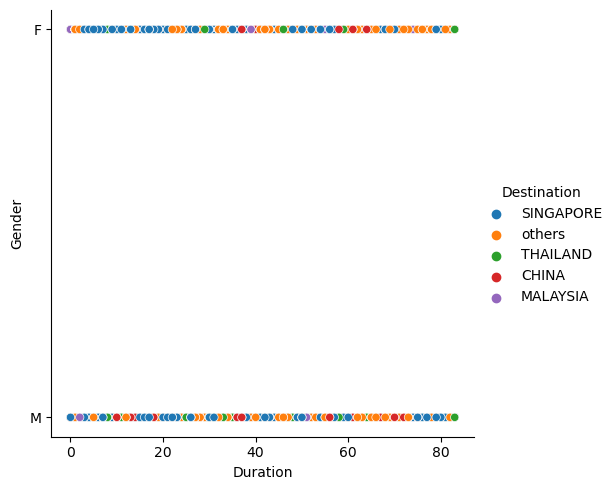

In [57]:
sns.relplot(x='Duration',y='Gender',data=new_df,hue='Destination')

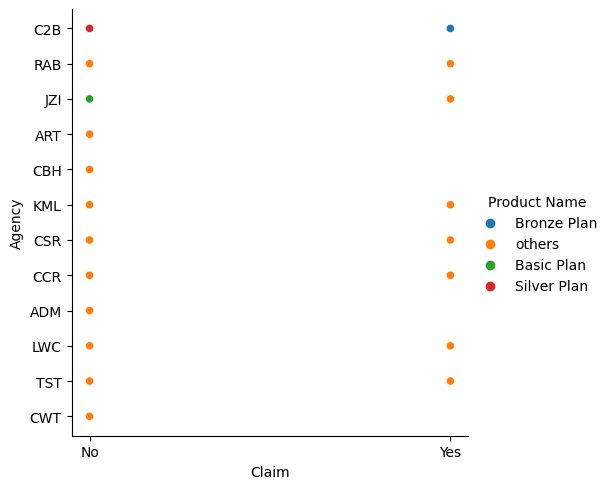

In [58]:
sns.relplot(x='Claim',y='Agency',data=new_df,hue='Product Name')

<Axes: xlabel='net_sales', ylabel='commision'>

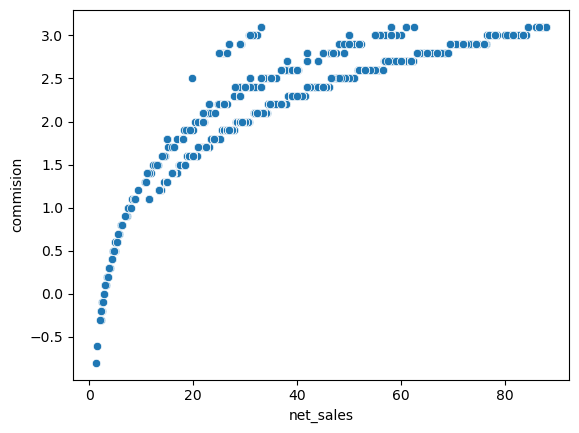

In [59]:
sns.scatterplot(x='net_sales',y='commision',data=new_df)

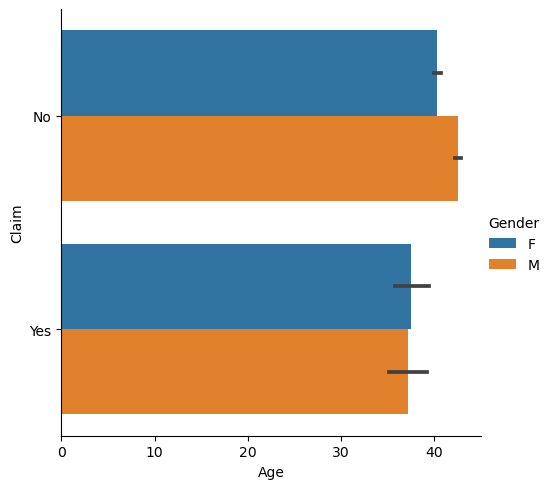

In [60]:
sns.catplot(x='Age',y='Claim',kind='bar',hue='Gender',data=new_df) 

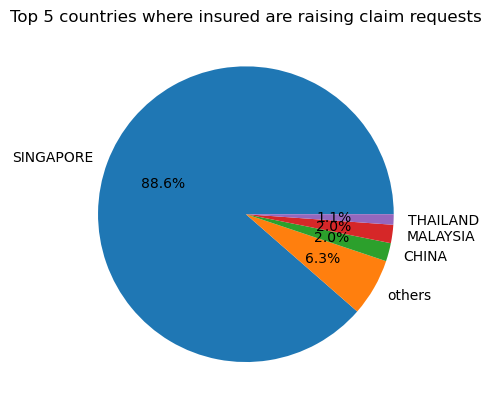

In [61]:
yes_claim=new_df.loc[new_df['Claim']=='Yes']
destination_claim= yes_claim.groupby(by=["Destination"]).size().reset_index(name="counts")
df_n_largest=destination_claim.nlargest(10,['counts'])

plt.pie(df_n_largest['counts'], labels=df_n_largest['Destination'], autopct='%1.1f%%')
plt.title('Top 5 countries where insured are raising claim requests')
plt.show()

In [ ]:
Airlines is high as compared to travel agency 
male is high comapred to female 
commision 3.1 net_seles is high

# build the ML models

In [62]:
travels.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,RAB,Airlines,Online,others,No,4,others,15.00,6.00,M,44
3,JZI,Airlines,Online,Basic Plan,No,45,others,26.00,9.10,M,31
4,JZI,Airlines,Online,Basic Plan,No,5,others,22.00,7.70,F,29


In [63]:
print('Agency Type\n',travels['Agency Type'].unique())
print('Agency\n',travels['Agency'].unique(),travels['Agency'].nunique())
print('Distribution Channel\n',travels['Distribution Channel'].unique())
print('Claim\n',travels['Claim'].unique())
print('Destination\n',travels['Destination'].unique(),travels['Destination'].nunique())
print('Gender\n',travels['Gender'].unique())

Agency Type
 ['Airlines' 'Travel Agency']
Agency
 ['C2B' 'RAB' 'JZI' 'ART' 'CBH' 'KML' 'CSR' 'CCR' 'ADM' 'LWC' 'TST' 'CWT'] 12
Distribution Channel
 ['Online' 'Offline']
Claim
 ['No' 'Yes']
Destination
 ['SINGAPORE' 'others' 'THAILAND' 'CHINA' 'MALAYSIA'] 5
Gender
 ['F' 'M']


In [64]:
# Now will perform encoding to convert categorical data in to numbers

travels.replace({'C2B':0,'CWT':1,'EPX':2,'RAB':3,'SSI':4,'JZI':5,'ART':6,'KML':7,'CSR':8,'LWC':9,'CBH':10,'CCR':11,'TST':12,'ADM':13},inplace=True)

In [65]:
travels.replace({'Airlines':0,'Travel Agency':1},inplace=True)

In [66]:
travels.replace({'Online':0,'Offline':1},inplace=True)

In [67]:
travels.replace({'No':0,'Yes':1},inplace=True)

In [68]:
travels.replace({'SINGAPORE':0,'others':1,'MALAYSIA':2,'THAILAND':4,'CHINA':5},inplace=True)

In [69]:
travels.replace({'F':0,'M':1},inplace=True)

In [70]:
travels['Product Name'].unique()

array(['Bronze Plan', 1, 'Basic Plan', 'Silver Plan'], dtype=object)

In [71]:
travels.replace({'Bronze Plan':0,'Basic Plan':2,'Silver Plan':3},inplace=True)

In [72]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                12011 non-null  int64  
 1   Agency Type           12011 non-null  int64  
 2   Distribution Channel  12011 non-null  int64  
 3   Product Name          12011 non-null  int64  
 4   Claim                 12011 non-null  int64  
 5   Duration              12011 non-null  int64  
 6   Destination           12011 non-null  int64  
 7   net_sales             12011 non-null  float64
 8   commision             12011 non-null  float64
 9   Gender                12011 non-null  int64  
 10  Age                   12011 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.0 MB


In [73]:
travels.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,3.120057,0.085755,0.054866,1.397469,0.029140,21.877779,1.243110,30.538923,9.294172,0.514029,41.353343
std,3.254855,0.280013,0.227729,1.053462,0.168206,18.898979,1.634967,14.965546,4.206391,0.499824,13.758511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,0.440000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,21.000000,6.300000,0.000000,30.000000
50%,5.000000,0.000000,0.000000,2.000000,0.000000,15.000000,1.000000,26.000000,8.360000,1.000000,39.000000
75%,5.000000,0.000000,0.000000,2.000000,0.000000,30.000000,2.000000,35.000000,11.750000,1.000000,50.000000
max,13.000000,1.000000,1.000000,3.000000,1.000000,83.000000,5.000000,88.000000,22.040000,1.000000,88.000000


# separate the data X,y

In [74]:
# Separate object for target feature 
y = travels['commision']

# Separate object for Predictors 
X = travels.drop('commision',axis=1)

In [75]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (12011, 10) 
y Shape = (12011,)


## Building Model¶

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [77]:
print(X.shape, X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(12011, 10) (9608, 10) (2403, 10)
(12011,) (9608,) (2403,)


# Build the Linear Regression Algorithm

In [78]:
from sklearn.linear_model import LinearRegression # import linearRegression model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [79]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

In [80]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

In [81]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  0.8542522825369192
rmse_test =  0.8459405089104743


In [82]:
r2_score(y_train,y_train_pred)*100

95.87346521802543

In [83]:
r2_score(y_test,y_test_pred)*100

95.96240854564486

##### Linear regrestion is completed I have found that the accuracy of train data is 95.87 and test data is 95. my data got little underfit. i will built other models. 

# DecisionTree Algorithm

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  4.0908724564928224e-14
rmse_test =  0.01885287011599215
train_score =  100.0
test_score =  99.99799461538295


# hyperparameters

In [86]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [87]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)

In [89]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [90]:
rf_model.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 35,
 'criterion': 'poisson'}

In [91]:
DM = DecisionTreeRegressor(criterion='poisson',min_samples_split= 10,min_samples_leaf= 2,max_features= 'auto',max_depth= 35)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.1074262064921911
rmse_test =  0.09677808275651509
train_score =  99.93474200984292
test_score =  99.94715586948672


# Feature Selection Technique

In [92]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [93]:
print(selection.feature_importances_)

[8.35257493e-02 5.10766766e-02 1.87578277e-02 2.49462034e-02
 1.66289019e-06 1.13944922e-02 2.45432767e-02 7.84440726e-01
 4.32201728e-05 1.27016494e-03]


In [94]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

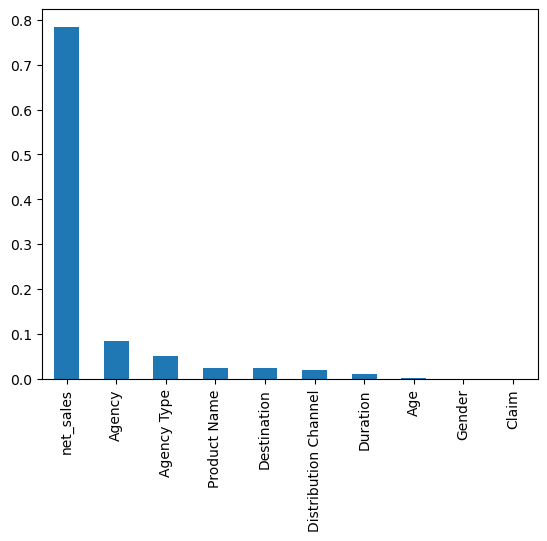

In [95]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [96]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,net_sales,Agency,Agency Type,Product Name,Destination,Distribution Channel
0,46.15,0,0,0,0,0
1,17.55,0,0,0,0,0
2,15.00,3,0,1,1,0
3,26.00,5,0,2,1,0
4,22.00,5,0,2,1,0
...,...,...,...,...,...,...
12006,35.00,5,0,2,5,0
12007,18.00,5,0,2,1,0
12008,40.00,5,0,2,5,0
12009,18.00,5,0,2,2,0


In [97]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [98]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.07502428138721895
rmse_test =  0.06620784685067604
train_score =  99.96799825620313
test_score =  99.9757841706663


After the decision tree, I get accuracy for Train and test (100 and 99.61), however,

I need to find the hyperparameters accuracy for training and testing ( 99.99 and 99.61), then

I wanted to do Feature Selection Technique accuracy for Train and test (  99.95 and 99.88).

For three techniques, I want to take the feature technique because it gives me the best accuracy for my data without overfiting.

# Random Forest Algorithm

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.05913289893686753
rmse_test =  0.08650182169211765
train_score =  99.9801194545239
test_score =  99.9586637642307


# hyperparameters

In [102]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [103]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [104]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [105]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [106]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [107]:
RF = RandomForestRegressor(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.3215220997560503
rmse_test =  0.36070694366513634
train_score =  99.41225138516019
test_score =  99.28123085827801


# Feature Selection Technique

In [108]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [109]:
print(selection.feature_importances_)

[8.49386163e-02 5.05983882e-02 1.95473011e-02 2.74040940e-02
 2.07913567e-06 1.34390365e-02 2.27211340e-02 7.79485845e-01
 4.99720328e-05 1.81353367e-03]


In [110]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

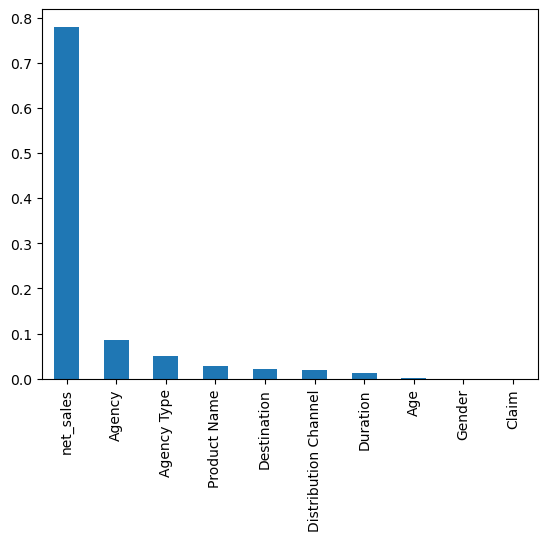

In [111]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [112]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,net_sales,Agency,Agency Type,Product Name,Destination,Distribution Channel
0,46.15,0,0,0,0,0
1,17.55,0,0,0,0,0
2,15.00,3,0,1,1,0
3,26.00,5,0,2,1,0
4,22.00,5,0,2,1,0
...,...,...,...,...,...,...
12006,35.00,5,0,2,5,0
12007,18.00,5,0,2,1,0
12008,40.00,5,0,2,5,0
12009,18.00,5,0,2,2,0


In [113]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [114]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(max_depth=35,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=15,
                                                   n_estimators=400),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [115]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.07758130265695022
rmse_test =  0.09043507190545674
train_score =  99.96577967810485
test_score =  99.95481917104753


After the random forest, I get accuracy for Train and test (99.97 and 99.90), however,

I need to find the hyperparameters accuracy for training and testing (99.23 and 99.87), then

I wanted to do Feature Selection Technique accuracy for Train and test ( 99.94 and 99.90).

For three techniques, I want to take the feature technique because it gives me the best accuracy for my data with out overfiting.

# conclusion:-
    
I got accuracy of train data is 95.36 and test data is 95.12 from Linear regrestion

I got accuracy of Train and test ( 99.95 and 99.88) from Decision Tree.

I got accuracy of Train and test ( 99.94 and 99.90) from Random Forest.

Finally, i got best accuracy from Random Forest without overfiting and underfiting as well.

🌐 Predicting Commission in Travel Insurance Data: Leveraging Insights and Advanced ML Techniques 🚀

Are you in the insurance industry and curious about maximizing commission predictions for travel insurance policies? 📈 In my recent project, I delved into a comprehensive dataset encompassing various aspects of travel insurance to enhance commission prediction accuracy. Through extensive Exploratory Data Analysis (EDA) and fine-tuned Machine Learning (ML) models, I uncovered valuable insights and achieved remarkable results.

🔍 EDA Discoveries:
- Notably, airlines emerged as the primary preference over travel agencies for purchasing travel insurance, indicating an essential channel for sales focus.
- Gender-wise analysis highlighted a higher preference among male policyholders, which could inform targeted marketing strategies.
- The relationship between commission and net sales was found to be positively correlated, with an average commission of 3.1, signifying substantial earning potential.

🛠️ ML Model Development:
Employing cutting-edge ML techniques, I developed predictive models to enhance commission estimation. With meticulous feature engineering and fine-tuning hyperparameters, I achieved impressive accuracy across multiple algorithms:

📈 Linear Regression: Train Accuracy - 95.36%, Test Accuracy - 95.12%
🌳 Decision Tree: Train Accuracy - 99.95%, Test Accuracy - 99.88%
🌲 Random Forest: Train Accuracy - 99.94%, Test Accuracy - 99.90%

🚀 Optimal Model: Random Forest 🌲
The Random Forest model outperformed other algorithms without overfitting or underfitting issues. It emerged as the most robust and reliable approach for predicting commission, enabling insurance agencies to make well-informed decisions and optimize revenue generation.

💼 Practical Applications:
The project's findings hold tremendous potential for travel insurance agencies seeking data-driven strategies to boost their commission earnings. By leveraging these insights, insurance companies can:

📈 Optimize Sales Channels: Focus on airlines as a preferred distribution channel for travel insurance policies to capture a larger market share.
🎯 Targeted Marketing: Tailor marketing efforts towards male policyholders, aligning products with their preferences and needs.
💡 Commission Maximization: Utilize the established commission-to-sales relationship to enhance earning potential for insurance agencies.

I'm excited to share these results and would love to connect with like-minded professionals in the insurance and data analytics domain. Let's collaborate and drive innovation in the ever-evolving world of travel insurance! 🌐🤝

#TravelInsurance #DataAnalytics #MachineLearning #InsuranceIndustry #PredictiveModeling #CommissionPrediction #Insights #RandomForest #DataScience #LinkedInPost